In [326]:
#import lib 
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib 
import matplotlib.pyplot as plt
%matplotlib inline

### Đọc dữ liệu 

Dữ liệu được đọc từ file "<i>Data_analytics_Fire_fighter.csv</i>"

In [327]:
df_sale = pd.read_csv('Data_analytics_Fire_fighter.csv')
df_sale.head()

,Ngày tháng,Mã NV,Người bán hàng,Kênh phân phối,Quận,Tỉnh/ Thành phố,Vùng,Đơn vị mua,Mã hàng,Loại hàng,Tên hàng,Số lượng,ĐVT,Đơn giá,Chiết khấu,Thành tiền
0,10/23/16,ST01,Nguyễn Minh Tâm,Siêu thị,Bà Triệu,Hà Nội,Miền Bắc,Khách lẻ,F02,Thức ăn công thức dinh dưỡng,Nestlé NAN Kid 4,13,hộp,359000,0.0,4667000
1,04/08/15,ST05,Nguyễn Lan Tâm,Siêu thị,Phạm Hùng,Đà Nẵng,Miền Trung,Khách lẻ,B03,Bánh ngũ cốc ăn sáng,KOKO KRUNCH (170g),4,hộp,52000,0.0,208000
2,12/09/16,CH02,Hoàng Minh Trung,Cửa hàng sữa,TrầnH Văn Thụ,TP.HCM,Miền Nam,Khách lẻ,B01,Bánh ngũ cốc ăn sáng,CORN FLAKE,2,hộp,55000,0.0,110000
3,03/13/15,ST01,Nguyễn Minh Tâm,Siêu thị,Bà Triệu,Hà Nội,Miền Bắc,Khách lẻ,G03,Thực phẩm,Hạt nêm MAGGI ( 450g),16,gói,36000,0.0,576000
4,10/16/14,CH02,Hoàng Minh Trung,Cửa hàng sữa,TrầnH Văn Thụ,TP.HCM,Miền Nam,Khách lẻ,B04,Bánh ngũ cốc ăn sáng,Nestlé MILO ( 330g),5,hộp,79000,0.0,395000


In [328]:
df_sale.shape

(1944, 16)

### Mô tả tổng quan dữ liệu

1944 bản ghi dữ liệu bán hàng qua các năm từ 2014 tới 2016 

Mỗi bản ghi được được mô tả chi tiết bởi 16 trường thông tin tương ứng với 16 cột trong bảng dữ liệu

### Kiểm tra và làm sạch dữ liệu

In [329]:
#clean data
df_sale.isnull().sum()

Ngày tháng         0
Mã NV              0
Người bán hàng     0
Kênh phân phối     0
Quận               0
Tỉnh/ Thành phố    0
Vùng               0
Đơn vị mua         0
Mã hàng            0
Loại hàng          0
Tên hàng           0
 Số lượng          0
ĐVT                0
Đơn giá            0
Chiết khấu         0
Thành tiền         0
dtype: int64

<b> Kết quả: </b> Dữ liệu đảm bảo đầy đủ giá trị

In [330]:
#Đổi tên cột để sau thuận tiện cho truy vấn
df_sale.columns = df_sale.columns.str.replace('Ngày tháng','Date')
df_sale.columns = df_sale.columns.str.replace('Mã NV','Staff_code')
df_sale.columns = df_sale.columns.str.replace('Người bán hàng','Staff_name')
df_sale.columns = df_sale.columns.str.replace('Kênh phân phối','Channel')
df_sale.columns = df_sale.columns.str.replace('Quận','District')
df_sale.columns = df_sale.columns.str.replace('Tỉnh/ Thành phố','City')
df_sale.columns = df_sale.columns.str.replace('Vùng','Area')
df_sale.columns = df_sale.columns.str.replace('Đơn vị mua','Customer')
df_sale.columns = df_sale.columns.str.replace('Mã hàng','Product_code')
df_sale.columns = df_sale.columns.str.replace('Loại hàng','Product_category')
df_sale.columns = df_sale.columns.str.replace('Tên hàng','Product_name')
df_sale.columns = df_sale.columns.str.replace(' Số lượng ','Total_item')
df_sale.columns = df_sale.columns.str.replace('ĐVT','Unit')
df_sale.columns = df_sale.columns.str.replace('Đơn giá','Price')
df_sale.columns = df_sale.columns.str.replace('Chiết khấu','Discount')
df_sale.columns = df_sale.columns.str.replace('Thành tiền','Total_amount')

In [331]:
#chuyển kiểu dữ liệu trường ngày tháng thành datetime 
df_sale['Date'] = pd.to_datetime(df_sale['Date'])

In [332]:
df_sale.dtypes

Date                datetime64[ns]
Staff_code                  object
Staff_name                  object
Channel                     object
District                    object
City                        object
Area                        object
Customer                    object
Product_code                object
Product_category            object
Product_name                object
Total_item                   int64
Unit                        object
Price                        int64
Discount                   float64
Total_amount                 int64
dtype: object

In [333]:
import sqlite3

In [334]:
#Thực hiện thống kê các trường dữ liệu trong bảng 
df_sale.describe()

,Total_item,Price,Discount,Total_amount
count,1944.000000,1944.000000,1944.000000,1.944000e+03
mean,10.372942,112162.808642,0.004090,1.178487e+06
std,5.668970,131131.694167,0.012933,1.478061e+06
min,1.000000,5000.000000,0.000000,1.140000e+04
25%,6.000000,31000.000000,0.000000,2.337000e+05
50%,10.000000,55000.000000,0.000000,5.760000e+05
75%,15.000000,107000.000000,0.000000,1.244500e+06
max,20.000000,440000.000000,0.050000,4.840000e+06


In [335]:
df_statiscal = df_sale.describe()

In [336]:
#chuyển kiểu dữ liệu về int cho dễ nhìn 
df_statiscal.astype(int)

,Total_item,Price,Discount,Total_amount
count,1944,1944,1944,1944
mean,10,112162,0,1178487
std,5,131131,0,1478060
min,1,5000,0,11400
25%,6,31000,0,233700
50%,10,55000,0,576000
75%,15,107000,0,1244500
max,20,440000,0,4840000


<AxesSubplot:>

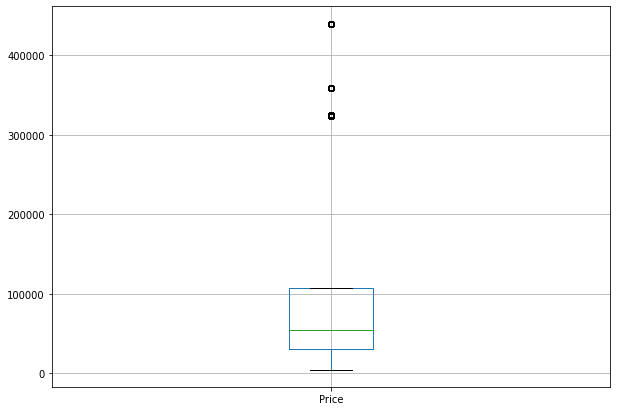

In [337]:
df_sale.boxplot(column='Price', figsize= (10,7))

Có 3 mặt hàng có giá trên 300.000 VNĐ, còn lại đa số có giá dưới 100.000 VNĐ

## Giá các mặt hàng đa dạng từ thấp tới cao (5000 -> 400.000)

In [338]:
#bổ sung cột tính năm, tháng, ngày dựa trên trường Date
df_sale['year'] = df_sale['Date'].apply(lambda x: x.year)
df_sale['month'] = df_sale['Date'].apply(lambda x: x.month)
df_sale['month_name'] = df_sale['Date'].apply(lambda x: x.strftime('%b'))
df_sale['year_month'] = df_sale['Date'].apply(lambda x: x.strftime('%Y.%m'))
df_sale['Date_detail'] = df_sale['Date'].apply(lambda x: x.strftime('%Y,%m,%d'))

In [347]:
#bổ sung cột tính quý dựa trên trường tháng 
df_sale['Quarter'] = df_sale['month'].apply(lambda x: (x-1)//3 + 1)

In [348]:
#tạo connect tới db, tạo bảng trên db dựa trên dataframe chứa dữ liệu 
cnn = sqlite3.connect('sale_1.db')
df_sale.to_sql('saless_tb', cnn)
%load_ext sql
%sql sqlite:///sale_1.db

The sql extension is already loaded. To reload it, use:
  %reload_ext sql


### Tổng doanh thu theo năm

In [349]:
#doanh thu và tăng trưởng doanh thu qua các năm 

revenue_by_year = %sql select year, sum(Total_amount) as Revenue from saless_tb group by year order by year
#chuyển kết quả query về dạng dataframe
revenue_by_year = pd.DataFrame(revenue_by_year)
#đổi tên cột dataframe vừa tạo
revenue_by_year = revenue_by_year.rename(columns={0:'year',1:'Total_amount'})
revenue_by_year['grown_revenue_rate'] = revenue_by_year['Total_amount'].pct_change()
revenue_by_year

   sqlite:///data_sales_vpbank.db
   sqlite:///mall_sale.db
 * sqlite:///sale_1.db
   sqlite:///sale_ecommerce.db
Done.


,year,Total_amount,grown_revenue_rate
0,2014,762079020,NaN
1,2015,813250710,0.067147
2,2016,715649090,-0.120014


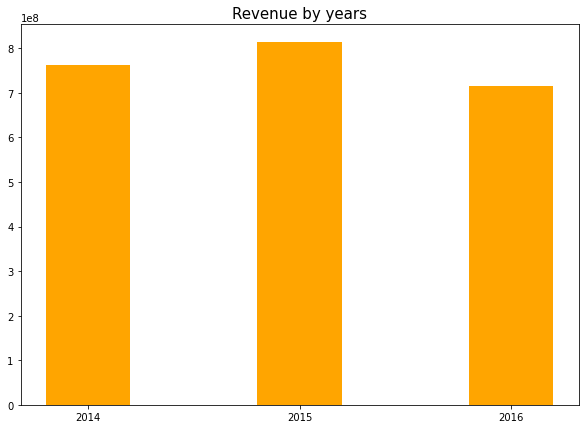

In [350]:
x_revenue_by_year = revenue_by_year['year']
y_revenue_by_year = revenue_by_year['Total_amount']

plt.figure(figsize=(10,7))
plt.title(label='Revenue by years', fontsize=15)
plt.bar(x_revenue_by_year, y_revenue_by_year, width = 0.4, color = 'orange')
plt.xticks(x_revenue_by_year, fontsize=10, rotation=0)
plt.yticks(fontsize=10, rotation=0)
plt.show()

### Nhận xét

- Tổng doanh thu các năm đều đạt trên 700 triệu đồng. Năm 2015 là năm có tổng doanh thu cao nhất là hơn 813 triệu đồng, trong khi đó năm 2016 có tổng doanh thu thấp nhất là khoảng 715 triệu đồng. 

- Doanh thu năm 2016 chứng kiến sự sụt giảm mạnh so với các năm trước. Cụ thể, doanh thu năm 2016 giảm 12% so với năm 2015.  

## Doanh thu 2016 thụt giảm so với các năm trước đó

### Tổng doanh thu theo vùng/miền qua các năm 

In [351]:
revenue_by_area_t = %sql select Year, Area, sum(Total_amount) as Revenue from saless_tb where Area = 'Miền Trung' group by Year, Area order by Year, Revenue
revenue_by_area_b = %sql select Year, Area, sum(Total_amount) as Revenue from saless_tb where Area = 'Miền Bắc' group by Year, Area order by Year, Revenue
revenue_by_area_n = %sql select Year, Area, sum(Total_amount) as Revenue from saless_tb where Area = 'Miền Nam' group by Year, Area order by Year, Revenue

#chuyển kết quả query về dạng dataframe
revenue_by_area_t = pd.DataFrame(revenue_by_area_t)
revenue_by_area_b = pd.DataFrame(revenue_by_area_b)
revenue_by_area_n = pd.DataFrame(revenue_by_area_n)
#đổi tên cột dataframe vừa tạo
revenue_by_area_t = revenue_by_area_t.rename(columns={0:'Year',1:'Area', 2:'Revenue'})
revenue_by_area_b = revenue_by_area_b.rename(columns={0:'Year',1:'Area', 2:'Revenue'})
revenue_by_area_n = revenue_by_area_n.rename(columns={0:'Year',1:'Area', 2:'Revenue'})

   sqlite:///data_sales_vpbank.db
   sqlite:///mall_sale.db
 * sqlite:///sale_1.db
   sqlite:///sale_ecommerce.db
Done.
   sqlite:///data_sales_vpbank.db
   sqlite:///mall_sale.db
 * sqlite:///sale_1.db
   sqlite:///sale_ecommerce.db
Done.
   sqlite:///data_sales_vpbank.db
   sqlite:///mall_sale.db
 * sqlite:///sale_1.db
   sqlite:///sale_ecommerce.db
Done.


In [352]:
revenue_by_area_t['growth_rate']= revenue_by_area_t['Revenue'].pct_change()
revenue_by_area_b['growth_rate']= revenue_by_area_b['Revenue'].pct_change()
revenue_by_area_n['growth_rate']= revenue_by_area_n['Revenue'].pct_change()

In [353]:
revenue_by_area_b

,Year,Area,Revenue,growth_rate
0,2014,Miền Bắc,292823420,NaN
1,2015,Miền Bắc,335549330,0.14591
2,2016,Miền Bắc,324087000,-0.03416


In [354]:
revenue_by_area_t

,Year,Area,Revenue,growth_rate
0,2014,Miền Trung,168920720,NaN
1,2015,Miền Trung,177768160,0.052376
2,2016,Miền Trung,137449970,-0.226802


In [355]:
revenue_by_area_n

,Year,Area,Revenue,growth_rate
0,2014,Miền Nam,300334880,NaN
1,2015,Miền Nam,299933220,-0.001337
2,2016,Miền Nam,254112120,-0.152771


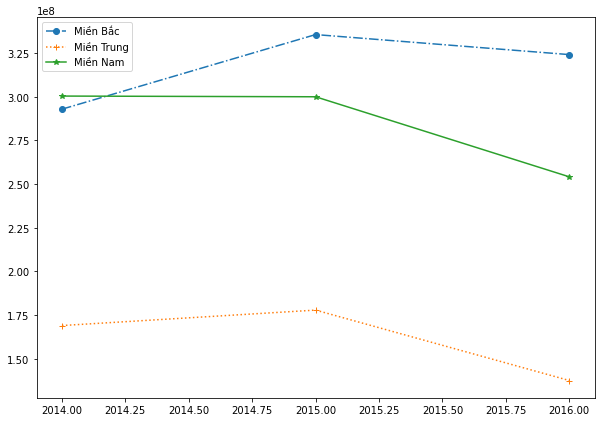

In [356]:
x_year = [2014, 2015, 2016]
y_revenue_by_area_b = revenue_by_area_b['Revenue']
y_revenue_by_area_t = revenue_by_area_t['Revenue']
y_revenue_by_area_n = revenue_by_area_n['Revenue']

plt.figure(figsize=(10,7))
plt.plot(x_year, y_revenue_by_area_b, label='Miền Bắc', linestyle='-.', marker='o')
plt.plot(x_year, y_revenue_by_area_t, label='Miền Trung', linestyle=':', marker='+')
plt.plot(x_year, y_revenue_by_area_n, label='Miền Nam', linestyle='-', marker='*')
plt.legend()
plt.show()

### Nhận xét 

- Đối với khu vực miền bắc: nhìn chung, xét về cơ cấu doanh thu theo vùng miền qua các năm, miền bắc chiềm tỷ trọng cao hơn so với các khu vực khác. Năm 2015 chứng kiến tăng trưởng doanh thu tăng khoảng hơn 14% so với năm 2014, nhưng sau đó, doanh thu 2016 giảm khoảng 3% so với 2015.  

- Đối với khu vực miền trung: trong cơ cấu doanh thu giữa các khu vực, miền trung là khu vực có tổng doanh thu thấp nhất so với 2 khu vực còn lại. Tương tự như miền bắc, doanh thu tăng 5% vào năm 2015, doanh thu 2016 giảm 22% so với 2015. 

- Đối với khu vực miền nam: chứng kiến sự sụt giảm doanh thu từ 2014 tới 2016. Doanh thu năm 2015 giảm 0.1% so với 2014, doanh thu năm 2016 giảm 15% so với 2015. 

## Doanh thu từ khu vực miền bắc chiếm tỷ trọng cao nhất 

## Khu vực miền nam và miền trung chứng kiến thụt giảm doanh thu mạnh vào năm 2016

### Kết quả bán hàng của nhân viên 

In [357]:
%%sql 

select year, count(distinct Staff_code)
from saless_tb 
group by year 
order by year 

   sqlite:///data_sales_vpbank.db
   sqlite:///mall_sale.db
 * sqlite:///sale_1.db
   sqlite:///sale_ecommerce.db
Done.


year,count(distinct Staff_code)
2014,17
2015,17
2016,17


## Số lượng nhân viên cố định các năm là 17

Số lượng nhân viên bán hàng qua các năm đều là 17 nhân viên 

In [358]:
avg_revenue = %sql select year, sum(Total_amount)/count(distinct Staff_code) as staff_avg_revenue from saless_tb group by year order by year 

#chuyển kết quả query về dạng dataframe
avg_revenue = pd.DataFrame(avg_revenue)
#đổi tên cột dataframe vừa tạo
avg_revenue = avg_revenue.rename(columns={0:'Year',1:'Staff_avg_revenue'})
avg_revenue['grow_rate'] = avg_revenue['Staff_avg_revenue'].pct_change()
avg_revenue

   sqlite:///data_sales_vpbank.db
   sqlite:///mall_sale.db
 * sqlite:///sale_1.db
   sqlite:///sale_ecommerce.db
Done.


,Year,Staff_avg_revenue,grow_rate
0,2014,44828177,NaN
1,2015,47838277,0.067147
2,2016,42097005,-0.120014


Doanh thu bán hàng trung bình/nhân viên hàng năm khoảng trên 40 triệu đồng, năm 2014 là khoảng 44 triệu đồng, năm 2015 khoảng 47 triệu đồng và năm 2016 là khoảng 42 triệu đồng.

Năm 2016, hiệu quả bán hàng của nhân viên giảm sút, doanh thu bán hàng trung bình/nhân viên năm 2016 giảm 12% so với 2015.

## Năng suất bán hàng của nhân viên năm 2016 giảm thấp so với các năm trước đó

In [359]:
%%sql 

select distinct year, Staff_code, Staff_name, sum(Total_amount) as Revenue
from saless_tb 
group by year, Staff_code
order by year, Revenue desc

   sqlite:///data_sales_vpbank.db
   sqlite:///mall_sale.db
 * sqlite:///sale_1.db
   sqlite:///sale_ecommerce.db
Done.


year,Staff_code,Staff_name,Revenue
2014,ST04,Nguyễn Hạnh Hoa,59230190
2014,NT01,Phạm Hải Anh,57049260
2014,NT03,Lương Mạnh Tuấn,54976150
2014,DL03,Trần Đức Anh,54764920
2014,DL05,Nguyễn Hồng Trang,54164960
2014,DL02,Lê Minh Trang,50305280
2014,DL01,Lê Ngọc Lân,47527100
2014,CH02,Hoàng Minh Trung,46128350
2014,ST05,Nguyễn Lan Tâm,45071270
2014,DL04,Nguyễn Quang Hải,43405750


Trên đây là bảng tổng hợp kết quả bán hàng của các nhân viên sắp xếp theo thứ tự từ cao tới thấp. 

Từ bảng tổng hợp có thể biết được nhân viên có kết quả bán hàng tốt nhất mỗi năm:

- Năm 2014: ST04-Nguyễn Hạnh Hoa với doanh thu là 59.230.190 đồng

- Năm 2015: ST02-Hoàng Ngọc Minh với doanh thu là 79.888.200 đồng 

- Năm 2016: CH01-Trần Trung Hiếu với doanh thu là 61.935.650 đồng

## Nhân viên bán hàng giỏi nhất 

### Tổng doanh thu theo kênh phân phối 

In [360]:
revenue_by_channel_ch = %sql select Year, Channel, sum(Total_amount) as Revenue from saless_tb where Channel = 'Cửa hàng sữa' group by Year, Channel order by Year, Revenue
revenue_by_channel_đl = %sql select Year, Channel, sum(Total_amount) as Revenue from saless_tb where Channel = 'Đại lý' group by Year, Channel order by Year, Revenue
revenue_by_channel_nt = %sql select Year, Channel, sum(Total_amount) as Revenue from saless_tb where Channel = 'Nhà thuốc' group by Year, Channel order by Year, Revenue
revenue_by_channel_st = %sql select Year, Channel, sum(Total_amount) as Revenue from saless_tb where Channel = 'Siêu thị' group by Year, Channel order by Year, Revenue


#chuyển kết quả query về dạng dataframe
revenue_by_channel_ch = pd.DataFrame(revenue_by_channel_ch)
revenue_by_channel_đl = pd.DataFrame(revenue_by_channel_đl)
revenue_by_channel_nt = pd.DataFrame(revenue_by_channel_nt)
revenue_by_channel_st = pd.DataFrame(revenue_by_channel_st)
#đổi tên cột dataframe vừa tạo
revenue_by_channel_ch = revenue_by_channel_ch.rename(columns={0:'Year',1:'Channel', 2:'Revenue'})
revenue_by_channel_đl = revenue_by_channel_đl.rename(columns={0:'Year',1:'Channel', 2:'Revenue'})
revenue_by_channel_nt = revenue_by_channel_nt.rename(columns={0:'Year',1:'Channel', 2:'Revenue'})
revenue_by_channel_st = revenue_by_channel_st.rename(columns={0:'Year',1:'Channel', 2:'Revenue'})

revenue_by_channel_ch['growth_rate']= revenue_by_channel_ch['Revenue'].pct_change()
revenue_by_channel_đl['growth_rate']= revenue_by_channel_đl['Revenue'].pct_change()
revenue_by_channel_nt['growth_rate']= revenue_by_channel_nt['Revenue'].pct_change()
revenue_by_channel_st['growth_rate']= revenue_by_channel_st['Revenue'].pct_change()

   sqlite:///data_sales_vpbank.db
   sqlite:///mall_sale.db
 * sqlite:///sale_1.db
   sqlite:///sale_ecommerce.db
Done.
   sqlite:///data_sales_vpbank.db
   sqlite:///mall_sale.db
 * sqlite:///sale_1.db
   sqlite:///sale_ecommerce.db
Done.
   sqlite:///data_sales_vpbank.db
   sqlite:///mall_sale.db
 * sqlite:///sale_1.db
   sqlite:///sale_ecommerce.db
Done.
   sqlite:///data_sales_vpbank.db
   sqlite:///mall_sale.db
 * sqlite:///sale_1.db
   sqlite:///sale_ecommerce.db
Done.


In [361]:
revenue_by_channel_ch

,Year,Channel,Revenue,growth_rate
0,2014,Cửa hàng sữa,71047350,NaN
1,2015,Cửa hàng sữa,112547000,0.584113
2,2016,Cửa hàng sữa,93682970,-0.167610


In [362]:
revenue_by_channel_đl

,Year,Channel,Revenue,growth_rate
0,2014,Đại lý,250168010,NaN
1,2015,Đại lý,187219300,-0.251626
2,2016,Đại lý,201275250,0.075077


In [363]:
revenue_by_channel_nt

,Year,Channel,Revenue,growth_rate
0,2014,Nhà thuốc,220269200,NaN
1,2015,Nhà thuốc,220557760,0.001310
2,2016,Nhà thuốc,180019670,-0.183798


In [364]:
revenue_by_channel_st

,Year,Channel,Revenue,growth_rate
0,2014,Siêu thị,220594460,NaN
1,2015,Siêu thị,292926650,0.327897
2,2016,Siêu thị,240671200,-0.178391


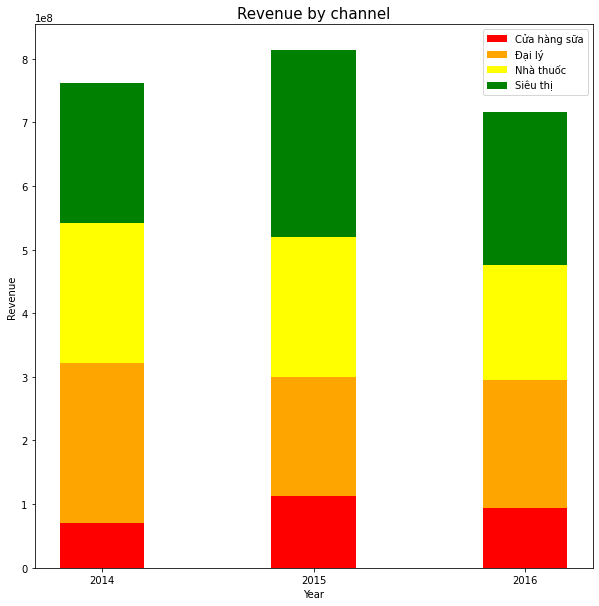

In [365]:
x_year = [2014, 2015, 2016]
y_revenue_by_channel_ch = revenue_by_channel_ch['Revenue']
y_revenue_by_channel_đl = revenue_by_channel_đl['Revenue']
y_revenue_by_channel_nt = revenue_by_channel_nt['Revenue']
y_revenue_by_channel_st = revenue_by_channel_st['Revenue']

plt.figure(figsize=(10,10))
plt.bar(x_year, y_revenue_by_channel_ch, width = 0.4, color = 'red')
plt.bar(x_year, y_revenue_by_channel_đl, width = 0.4, bottom = y_revenue_by_channel_ch, color = 'orange')
plt.bar(x_year, y_revenue_by_channel_nt, width = 0.4, bottom = y_revenue_by_channel_ch + y_revenue_by_channel_đl, color = 'yellow')
plt.bar(x_year, y_revenue_by_channel_st, width = 0.4, bottom = y_revenue_by_channel_ch + y_revenue_by_channel_đl + y_revenue_by_channel_nt, color = 'green')
plt.xlabel('Year')
plt.ylabel('Revenue')
plt.xticks(x_year, fontsize=10)
plt.yticks(fontsize=10)
plt.legend(['Cửa hàng sữa','Đại lý','Nhà thuốc','Siêu thị'])
plt.title('Revenue by channel', fontsize = 15)
plt.show()

### Nhận xét 

Dựa vào biểu đồ trên, có thể thấy được một vài sự thay đổi của doanh thu trên mỗi kênh bán hàng. Hệ thống siêu thị và cửa hàng sữa có xu hướng tăng trưởng doanh thu vào 2015 và giảm vào 2016. Cụ thể, năm 2015 doanh thu của các cửa hàng sữa tăng mạnh tới hơn 58% so với 2014, trong khi đó mức tăng tương ứng của hệ thống các siêu thị là hơn 32%. 

### Phân tích doanh thu năm 2016

### Doanh thu theo quý

In [366]:
revenue_by_quarter_16 = %sql select Quarter, sum(Total_amount) as Revenue from saless_tb where Year = 2016 group by Quarter order by Quarter

   sqlite:///data_sales_vpbank.db
   sqlite:///mall_sale.db
 * sqlite:///sale_1.db
   sqlite:///sale_ecommerce.db
Done.


In [367]:
revenue_by_quarter_16

Quarter,Revenue
1,191499120
2,188316280
3,188779940
4,147053750


In [371]:
#chuyển kết quả query về dạng dataframe
revenue_by_quarter_16 = pd.DataFrame(revenue_by_quarter_16)
#đổi tên cột dataframe vừa tạo
revenue_by_quarter_16 = revenue_by_quarter_16.rename(columns={0:'Quarter',1:'Revenue'})
revenue_by_quarter_16['grow_rate'] = revenue_by_quarter_16['Revenue'].pct_change()
revenue_by_quarter_16

,Quarter,Revenue,grow_rate
0,1,191499120,NaN
1,2,188316280,-0.016621
2,3,188779940,0.002462
3,4,147053750,-0.221031


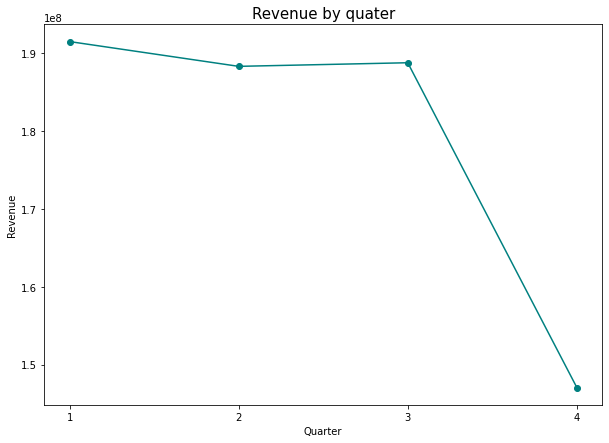

In [369]:
x_revenue_quarter = revenue_by_quarter_16['Quarter']
y_revenue_quarter = revenue_by_quarter_16['Revenue']

plt.figure(figsize=(10,7))
plt.plot(x_revenue_quarter, y_revenue_quarter, color = 'Teal', marker = 'o')
plt.title(label = 'Revenue by quater', fontsize = 15)
plt.xlabel('Quarter')
plt.ylabel('Revenue')
plt.xticks(x_revenue_quarter, fontsize = 10, rotation=0)
plt.yticks(fontsize = 10)
plt.show()

### Nhận xét 

Từ các phân tích trên, có thể thấy tổng doanh thu năm 2016 thấp hơn so với các năm trước đó. Từ biểu đồ trên, doanh thu quý 4 2016 giảm mạnh ảnh hưởng trực tiếp tới tổng doanh thu cả năm 2016. Cụ thể, doanh thu quý 4 thấp hơn doanh thu quý 3 khoảng hơn 22%

## Qúy 4 năm 2016 thụt giảm mạnh doanh thu 

### Doanh thu theo tháng

In [372]:
revenue_by_year_month = %sql select year_month, sum(Total_amount) from saless_tb group by year_month order by year_month

#chuyển kết quả query về dạng dataframe
revenue_by_year_month = pd.DataFrame(revenue_by_year_month)
#đổi tên cột dataframe vừa tạo
revenue_by_year_month = revenue_by_year_month.rename(columns={0:'Year_month',1:'Revenue'})
revenue_by_year_month

   sqlite:///data_sales_vpbank.db
   sqlite:///mall_sale.db
 * sqlite:///sale_1.db
   sqlite:///sale_ecommerce.db
Done.


,Year_month,Revenue
0,2014.01,43426080
1,2014.02,65518840
2,2014.03,58449170
3,2014.04,43097240
4,2014.05,72599370
5,2014.06,77063390
6,2014.07,83276640
7,2014.08,45755850
8,2014.09,76894900
9,2014.10,71916700


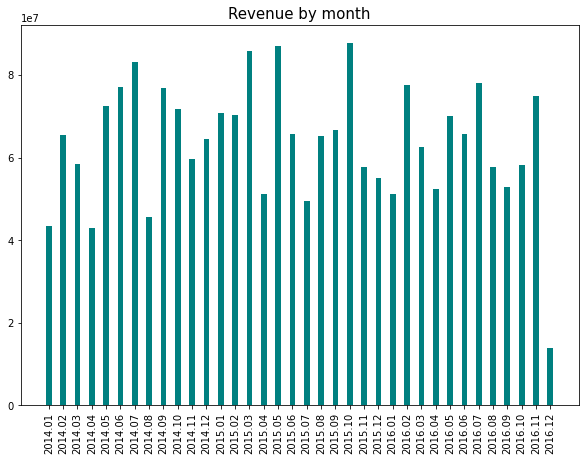

In [373]:
x_revenue_by_year_month = revenue_by_year_month['Year_month']
y_revenue_by_year_month = revenue_by_year_month['Revenue']

plt.figure(figsize=(10,7))
plt.title(label='Revenue by month', fontsize=15)
plt.bar(x_revenue_by_year_month, y_revenue_by_year_month, width = 0.4, color = 'teal')
plt.xticks(x_revenue_by_year_month, fontsize=10, rotation=90)
plt.yticks(fontsize=10, rotation=0)
plt.show()

## Doanh thu tháng 12 thấp kỷ lục, ảnh hưởng tới doanh thu quý và năm

In [374]:
revenue_12 = %sql select year, month, sum(Total_amount) as revenue from saless_tb where month = 12 group by year, month order by year
#chuyển kết quả query về dạng dataframe
revenue_12 = pd.DataFrame(revenue_12)
#đổi tên cột dataframe vừa tạo
revenue_12 = revenue_12.rename(columns={0:'Year',1:'Month', 2:'Revenue'})
revenue_12['grow_revenue_12'] = revenue_12['Revenue'].pct_change()
revenue_12

   sqlite:///data_sales_vpbank.db
   sqlite:///mall_sale.db
 * sqlite:///sale_1.db
   sqlite:///sale_ecommerce.db
Done.


,Year,Month,Revenue,grow_revenue_12
0,2014,12,64427240,NaN
1,2015,12,55196670,-0.143271
2,2016,12,13976550,-0.746786


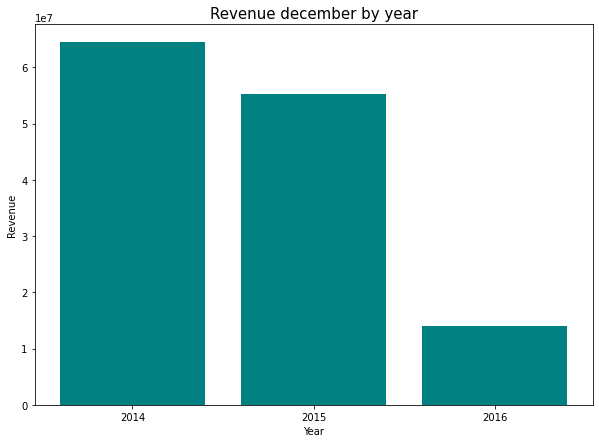

In [210]:
x_12 = revenue_12['Year']
y_12 = revenue_12['Revenue']

plt.figure(figsize=(10,7))
plt.bar(x_12, y_12, color = 'teal')
plt.title(label = 'Revenue december by year', fontsize = 15)
plt.xlabel('Year')
plt.ylabel('Revenue')
plt.xticks(x_12, fontsize = 10, rotation=0)
plt.yticks(fontsize = 10)
plt.show()

### Nhận xét

Từ biểu đồ trên có thể thấy, doanh thu quý 4 năm 2016 giảm mạnh so với các quý trước đó là do doanh thu tháng 12 năm 2016 giảm mạnh bất ngờ, so với cùng kỳ tháng 12 năm 2015, mức giảm lên tới gần 75%. 

==> Cần kiểm tra nguyên nhân khiến doanh thu giảm mạnh như trên.

<b>Số lượng nhân viên bán hàng tháng 12 qua các năm

In [385]:
%%sql 

select year, month, count(distinct Staff_code) as num_staff
from saless_tb 
where month = 12
group by year, month 
order by year 

   sqlite:///data_sales_vpbank.db
   sqlite:///mall_sale.db
 * sqlite:///sale_1.db
   sqlite:///sale_ecommerce.db
Done.


year,month,num_staff
2014,12,15
2015,12,15
2016,12,8


### Nhận xét 

Một trong những nguyên nhân khiến doanh thu tháng 12 sụt giảm là do thiếu nhân viên bán hàng. Cụ thể, số nhân viên bán hàng vào thời điểm tháng 12 năm 2016 chỉ là 8 người, ít hơn 3 người so với 2 năm trước đó.

## Tháng 12 năm 2016 có ít nhân viên bán hàng hơn so với các thời điểm khác

<b> Doanh số bán hàng trung bình/nhân viên tháng 12 năm 2016

In [376]:
staff_performance_by_year = %sql select year, sum(Total_amount)/count(distinct Staff_code) as staff_performance from saless_tb where month = 12 group by year order by year

#chuyển kết quả query về dạng dataframe
staff_performance_by_year = pd.DataFrame(staff_performance_by_year)
#đổi tên cột dataframe vừa tạo
staff_performance_by_year = staff_performance_by_year.rename(columns={0:'Year',1:'Staff_performance'})
staff_performance_by_year['grow_performance_rate'] = staff_performance_by_year['Staff_performance'].pct_change()
staff_performance_by_year

   sqlite:///data_sales_vpbank.db
   sqlite:///mall_sale.db
 * sqlite:///sale_1.db
   sqlite:///sale_ecommerce.db
Done.


,Year,Staff_performance,grow_performance_rate
0,2014,4295149,NaN
1,2015,3679778,-0.143271
2,2016,1747068,-0.525225


### Nhận xét

Nguyên nhân thứ hai dẫn tới giảm sụt về doanh thu ở tháng 12 năm 2016 là do hiệu suất bán hàng của các nhân viên không hiệu quả. Doanh số bán hàng/nhân viên tháng 12 năm 2016 chỉ đạt khoảng hơn 1.7 triệu đồng (giảm hơn 52% so với cùng kỳ năm 2015).

## Năng suất bán hàng của nhân viên trong tháng 12/2016 giảm hơn 52% so với các năm trước

In [386]:
revenue_by_city = %sql select City, sum(Total_amount) as Revenue from saless_tb where year = 2016 group by City order by Revenue desc
#chuyển kết quả query về dạng dataframe
revenue_by_city = pd.DataFrame(revenue_by_city)
#đổi tên cột dataframe vừa tạo
revenue_by_city = revenue_by_city.rename(columns={0:'City',1:'Staff_performance'})
revenue_by_city

   sqlite:///data_sales_vpbank.db
   sqlite:///mall_sale.db
 * sqlite:///sale_1.db
   sqlite:///sale_ecommerce.db
Done.


,City,Staff_performance
0,Hà Nội,324087000
1,TP.HCM,254112120
2,Đà Nẵng,137449970


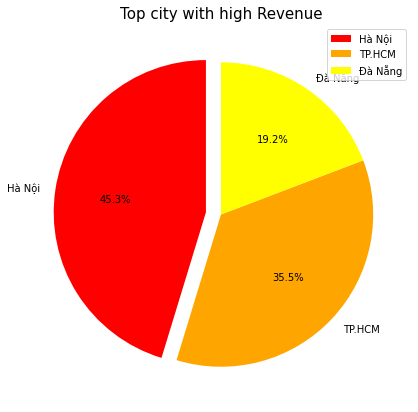

In [394]:
labels = revenue_by_city['City']
sizes = revenue_by_city['Staff_performance']
explodes = [0.1,0,0]
colors = ['red','orange','yellow']

plt.figure(figsize=(10,7))
plt.pie(sizes, labels = labels, explode = explodes,  colors = colors, startangle = 90, autopct='%1.1f%%')
plt.title('Top city with high Revenue', fontsize = 15)
plt.legend()
plt.show()

### Nhận xét 

Các điểm bán hàng đặt tại 3 thành phố lớn của cả nước. Hà Nội là thành phố có doanh thu bán hàng cao nhất với tỷ lệ chiếm trong cơ cấu doanh thu là hơn 45%, tiếp sau đó là TP HCM là 35.5%, cuối cùng là Đà Nẵng với 19.2%

## Hà Nội là thành phố chiểm tỷ trọng doanh thu cao nhất 

### Doanh thu theo khách hàng 

In [421]:
revenue_by_customer = %sql select Customer, sum(Total_amount) as Revenue from saless_tb where year = 2016 group by Customer order by Revenue desc
#chuyển kết quả query về dạng dataframe
revenue_by_customer = pd.DataFrame(revenue_by_customer)
#đổi tên cột dataframe vừa tạo
revenue_by_customer = revenue_by_customer.rename(columns={0:'Customer',1:'Revenue'})
revenue_by_customer

   sqlite:///data_sales_vpbank.db
   sqlite:///mall_sale.db
 * sqlite:///sale_1.db
   sqlite:///sale_ecommerce.db
Done.


,Customer,Revenue
0,Khách lẻ,530459000
1,Doanh nghiệp A,50759040
2,Trường học A,43431000
3,Doanh nghiệp B,41685050
4,Trường học B,25832000
5,Tổ chức A,23483000


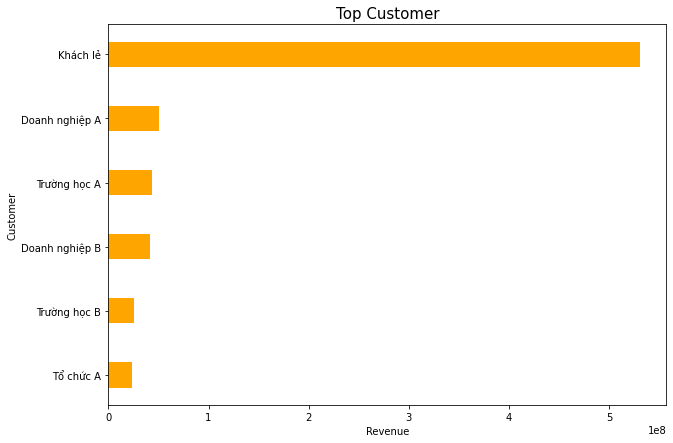

In [424]:
x_revenue = revenue_by_customer['Customer']
y_cust = revenue_by_customer['Revenue']

plt.figure(figsize=(10,7))
plt.barh(x_revenue, y_cust, height=0.4, color = 'orange')
plt.xlabel('Revenue', fontsize=10)
plt.ylabel('Customer', fontsize=10)
plt.title('Top Customer', fontsize=15)
plt.gca().invert_yaxis()
plt.show()

### Nhận xét 

Dựa vào biểu đồ trên có thể thấy, doanh thu chủ yếu tới từ nguồn khách lẻ (khoảng hơn 530 triệu đồng).

Thứ tự sắp xếp theo doanh thu các khách hàng tổ chức của công ty: 

- Doanh nghiêp A: 50.759.040 đồng 
- Trường học A: 43.431.000 đồng 
- Doanh nghiệp B: 41.685.050 đồng 
- Trường học B: 25.832.000 đồng
- Tổ chức A: 23.483.000 đồng 

## Doanh thu chủ yếu từ khách lẻ, xếp sau đó là một số khách hàng như Doanh nghiệp A, Trường học A

In [406]:
revenue_by_cust_tca = %sql select year, sum(Total_amount) as Revenue from saless_tb where Customer = 'Tổ chức A' and month = 12 group by year order by Revenue
revenue_by_cust_tha = %sql select year, sum(Total_amount) as Revenue from saless_tb where Customer = 'Trường học A' and month = 12 group by year order by Revenue
revenue_by_cust_thb = %sql select year, sum(Total_amount) as Revenue from saless_tb where Customer = 'Trường học B' and month = 12 group by year order by Revenue
revenue_by_cust_dna = %sql select year, sum(Total_amount) as Revenue from saless_tb where Customer = 'Doanh nghiệp A' and month = 12 group by year order by Revenue
revenue_by_cust_dnb = %sql select year, sum(Total_amount) as Revenue from saless_tb where Customer = 'Doanh nghiệp B' and month = 12 group by year order by Revenue
revenue_by_cust_kl = %sql select year, sum(Total_amount) as Revenue from saless_tb where Customer = 'Khách lẻ' and month = 12 group by year order by Revenue


#chuyển kết quả query về dạng dataframe
revenue_by_cust_tca = pd.DataFrame(revenue_by_cust_tca)
revenue_by_cust_tha = pd.DataFrame(revenue_by_cust_tha)
revenue_by_cust_thb = pd.DataFrame(revenue_by_cust_thb)
revenue_by_cust_dna = pd.DataFrame(revenue_by_cust_dna)
revenue_by_cust_dnb = pd.DataFrame(revenue_by_cust_dnb)
revenue_by_cust_kl = pd.DataFrame(revenue_by_cust_kl)

#đổi tên cột dataframe vừa tạo
revenue_by_cust_tca = revenue_by_cust_tca.rename(columns={0:'City',1:'Revenue'})
revenue_by_cust_tha = revenue_by_cust_tha.rename(columns={0:'City',1:'Revenue'})
revenue_by_cust_thb = revenue_by_cust_thb.rename(columns={0:'City',1:'Revenue'})
revenue_by_cust_dna = revenue_by_cust_dna.rename(columns={0:'City',1:'Revenue'})
revenue_by_cust_dnb = revenue_by_cust_dnb.rename(columns={0:'City',1:'Revenue'})
revenue_by_cust_kl = revenue_by_cust_kl.rename(columns={0:'City',1:'Revenue'})

   sqlite:///data_sales_vpbank.db
   sqlite:///mall_sale.db
 * sqlite:///sale_1.db
   sqlite:///sale_ecommerce.db
Done.
   sqlite:///data_sales_vpbank.db
   sqlite:///mall_sale.db
 * sqlite:///sale_1.db
   sqlite:///sale_ecommerce.db
Done.
   sqlite:///data_sales_vpbank.db
   sqlite:///mall_sale.db
 * sqlite:///sale_1.db
   sqlite:///sale_ecommerce.db
Done.
   sqlite:///data_sales_vpbank.db
   sqlite:///mall_sale.db
 * sqlite:///sale_1.db
   sqlite:///sale_ecommerce.db
Done.
   sqlite:///data_sales_vpbank.db
   sqlite:///mall_sale.db
 * sqlite:///sale_1.db
   sqlite:///sale_ecommerce.db
Done.
   sqlite:///data_sales_vpbank.db
   sqlite:///mall_sale.db
 * sqlite:///sale_1.db
   sqlite:///sale_ecommerce.db
Done.


In [408]:
revenue_by_cust_tca

,City,Revenue
0,2014,1728000
1,2015,1759000


In [409]:
revenue_by_cust_tha

,City,Revenue
0,2016,246000
1,2015,375000
2,2014,770000


In [410]:
revenue_by_cust_thb

,City,Revenue
0,2016,749000
1,2015,4235000
2,2014,9709000


In [411]:
revenue_by_cust_dna

,City,Revenue
0,2015,49920
1,2014,2264640


In [412]:
revenue_by_cust_dnb

,City,Revenue
0,2016,559550
1,2014,767600
2,2015,5856750


In [413]:
revenue_by_cust_kl

,City,Revenue
0,2016,12422000
1,2015,42921000
2,2014,49188000


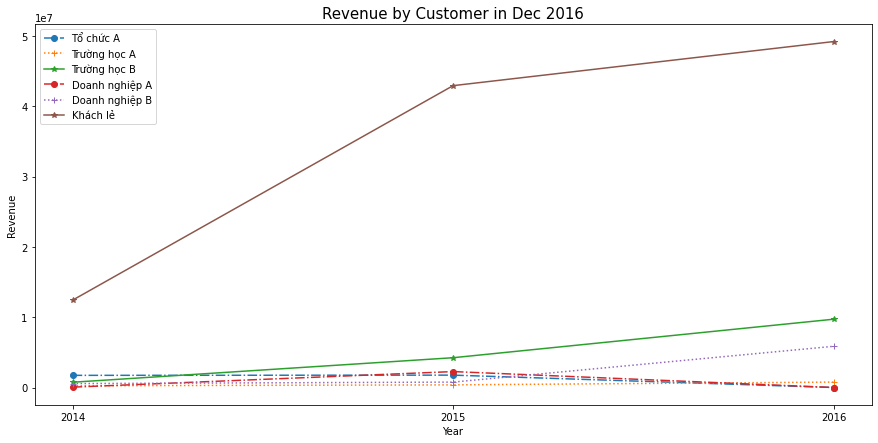

In [428]:
x_year = [2014, 2015, 2016]
y_revenue_by_cust_tca = [1728000,1759000,0]
y_revenue_by_cust_tha = revenue_by_cust_tha['Revenue']
y_revenue_by_cust_thb = revenue_by_cust_thb['Revenue']
y_revenue_by_cust_dna = [49920,2264640,0]
y_revenue_by_cust_dnb = revenue_by_cust_dnb['Revenue']
y_revenue_by_cust_kl = revenue_by_cust_kl['Revenue']

plt.figure(figsize=(15,7))
plt.plot(x_year, y_revenue_by_cust_tca, label='Tổ chức A', linestyle='-.', marker='o')
plt.plot(x_year, y_revenue_by_cust_tha, label='Trường học A', linestyle=':', marker='+')
plt.plot(x_year, y_revenue_by_cust_thb, label='Trường học B', linestyle='-', marker='*')
plt.plot(x_year, y_revenue_by_cust_dna, label='Doanh nghiệp A', linestyle='-.', marker='o')
plt.plot(x_year, y_revenue_by_cust_dnb, label='Doanh nghiệp B', linestyle=':', marker='+')
plt.plot(x_year, y_revenue_by_cust_kl, label='Khách lẻ', linestyle='-', marker='*')
plt.xlabel('Year', fontsize=10)
plt.ylabel('Revenue', fontsize=10)
plt.title('Revenue by Customer in Dec 2016', fontsize = 15)
plt.xticks(x_year, fontsize=10)
plt.legend()
plt.show()

### Nhận xét

Xét riêng cơ cấu khách hàng trong tháng 12 qua các năm có thể thấy, doanh thu từ các khách hàng lẻ, doanh nghiệp B, trường học B tiếp tục tăng. Trong khi đó, doanh thu từ tổ chức A giảm sút trong tháng 12 năm 2016 so với các năm trước, thậm chí doanh nghiệp A và trường học A còn không phát sinh giao dịch trong tháng 12 năm 2016. 

Đây cũng có thể được coi là nguyên nhân thứ 3 khiến doanh thu tháng 12 năm 2016 giảm mạnh ảnh hưởng tới doanh thu quý và doanh thu năm. 

## Doanh nghiệp A, Trường học A và Tổ chức A đều không phát sinh giao dịch trong tháng 12/2016 

### Doanh thu theo loại hàng

In [443]:
revenue_by_cat = %sql select Product_category, sum(Total_amount) as Revenue from saless_tb where year = 2016 group by Product_category order by Revenue

#chuyển kết quả query về dạng dataframe
revenue_by_cat = pd.DataFrame(revenue_by_cat)
#đổi tên cột dataframe vừa tạo
revenue_by_cat = revenue_by_cat.rename(columns={0:'Product_category',1:'Revenue'})
revenue_by_cat

   sqlite:///data_sales_vpbank.db
   sqlite:///mall_sale.db
 * sqlite:///sale_1.db
   sqlite:///sale_ecommerce.db
Done.


,Product_category,Revenue
0,Bánh kẹo,238920
1,Nước uống đóng chai,1072800
2,Bánh ngũ cốc ăn sáng,27727270
3,Cà phê,30637130
4,Thực phẩm,81022300
5,Thức uống,101817400
6,Thức ăn công thức dinh dưỡng,142641620
7,Sản phẩm dinh dưỡng y học,330491650


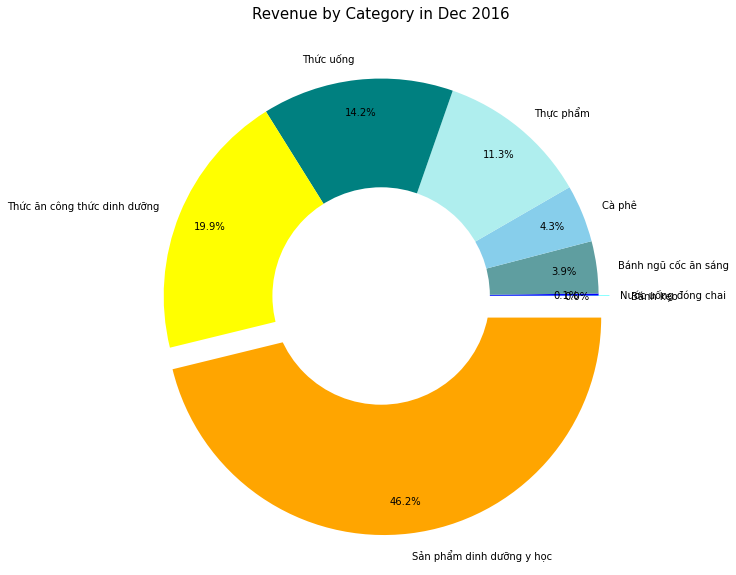

In [442]:
colors = ['aqua','blue','cadetblue','skyblue','paleturquoise','teal','yellow','orange']
# explosion
explode = [0.05,0,0,0,0,0,0,0.1]
#figure
plt.figure(figsize=(15,10)) 
# Pie Chart
plt.pie(revenue_by_cat['Revenue'], colors=colors, labels=revenue_by_cat['Product_category'],
        autopct='%1.1f%%', pctdistance=0.85,
        explode=explode, )
centre_circle = plt.Circle((0, 0), 0.50, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title('Revenue by Category in Dec 2016', fontsize=15)
  
plt.show()

### Nhận xét

Dựa trên cơ cấu doanh thu theo các loại hàng năm 2016, Sản phẩm dinh dưỡng y học và Thức ăn công thức dinh dưỡng là những loại hàng mang lại doanh thu nhiều nhất. Trong khi các loại hàng như Bánh kẹo hay Nước uống đóng chai thì doanh thu mang lại không đáng kể

## Sản phẩm dinh dưỡng y học và Thức ăn công thức dinh dưỡng chiếm tỷ trọng doanh thu cao nhất (đơn giá cao)

In [429]:
def pie_chart(labels, sizes):   
    fig1, ax1 = plt.subplots(figsize=(10, 7))
    fig1.subplots_adjust(0.3, 0, 1, 1)

    theme = plt.get_cmap('copper')
    ax1.set_prop_cycle("color", [theme(1. * i / len(sizes))
                                 for i in range(len(sizes))])

    _, _ = ax1.pie(sizes, startangle=90, radius=1800)

    ax1.axis('equal')

    total = sum(sizes)
    plt.legend(
        loc='upper left',
        labels=['%s, %1.1f%%' % (
            l, (float(s) / total) * 100)
                for l, s in zip(labels, sizes)],
        prop={'size': 11},
        bbox_to_anchor=(0.0, 1),
        bbox_transform=fig1.transFigure
    )

    plt.show()

In [444]:
revenue_by_category_14 = %sql select Product_category, sum(Total_amount) as Revenue from saless_tb where year = 2014 and month = 12 group by Product_category order by Revenue

#chuyển kết quả query về dạng dataframe
revenue_by_category_14 = pd.DataFrame(revenue_by_category_14)
#đổi tên cột dataframe vừa tạo
revenue_by_category_14 = revenue_by_category_14.rename(columns={0:'Product_category',1:'Revenue'})
revenue_by_category_14

   sqlite:///data_sales_vpbank.db
   sqlite:///mall_sale.db
 * sqlite:///sale_1.db
   sqlite:///sale_ecommerce.db
Done.


,Product_category,Revenue
0,Bánh kẹo,36000
1,Nước uống đóng chai,160000
2,Bánh ngũ cốc ăn sáng,1097600
3,Cà phê,1744000
4,Thực phẩm,5204000
5,Thức uống,6067640
6,Sản phẩm dinh dưỡng y học,20370000
7,Thức ăn công thức dinh dưỡng,29748000


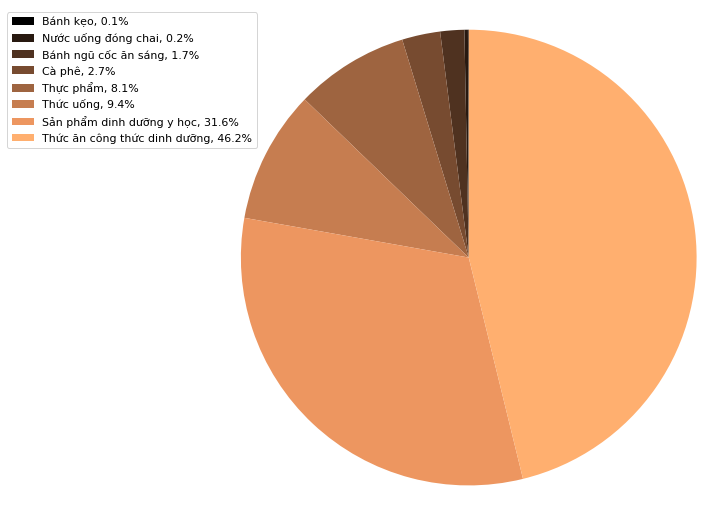

In [445]:
pie_chart(revenue_by_category_14['Product_category'], revenue_by_category_14['Revenue'])

In [446]:
revenue_by_category_15 = %sql select Product_category, sum(Total_amount) as Revenue from saless_tb where year = 2015 and month = 12 group by Product_category order by Revenue

#chuyển kết quả query về dạng dataframe
revenue_by_category_15 = pd.DataFrame(revenue_by_category_15)
#đổi tên cột dataframe vừa tạo
revenue_by_category_15 = revenue_by_category_15.rename(columns={0:'Product_category',1:'Revenue'})
revenue_by_category_15

   sqlite:///data_sales_vpbank.db
   sqlite:///mall_sale.db
 * sqlite:///sale_1.db
   sqlite:///sale_ecommerce.db
Done.


,Product_category,Revenue
0,Bánh kẹo,47520
1,Nước uống đóng chai,158400
2,Bánh ngũ cốc ăn sáng,2049000
3,Cà phê,3231000
4,Thực phẩm,4152750
5,Thức uống,5409000
6,Thức ăn công thức dinh dưỡng,15771000
7,Sản phẩm dinh dưỡng y học,24378000


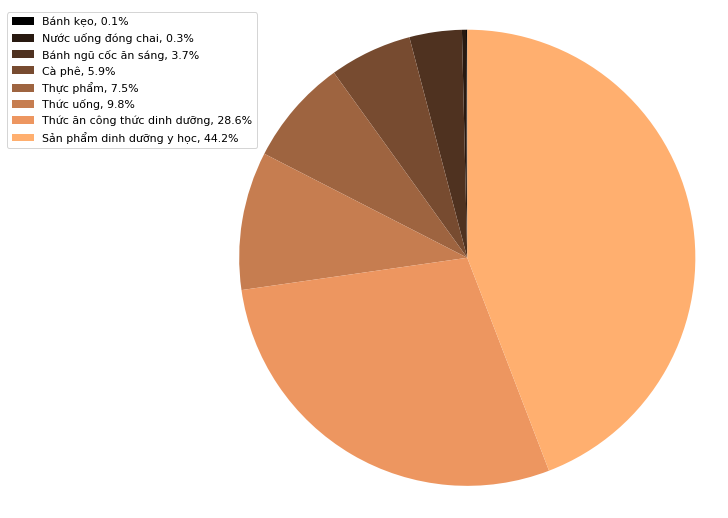

In [447]:
pie_chart(revenue_by_category_15['Product_category'], revenue_by_category_15['Revenue'])

In [280]:
revenue_by_category_16 = %sql select Product_category, sum(Total_amount) as Revenue from saless_tb where year = 2016 and month = 12 group by Product_category order by Revenue

#chuyển kết quả query về dạng dataframe
revenue_by_category_16 = pd.DataFrame(revenue_by_category_16)
#đổi tên cột dataframe vừa tạo
revenue_by_category_16 = revenue_by_category_16.rename(columns={0:'Product_category',1:'Revenue'})
revenue_by_category_16

   sqlite:///data_sales_vpbank.db
   sqlite:///mall_sale.db
 * sqlite:///sale_ecommerce.db
Done.


,Product_category,Revenue
0,Nước uống đóng chai,80000
1,Bánh ngũ cốc ăn sáng,524000
2,Cà phê,1241000
3,Thức uống,1729550
4,Thực phẩm,2322000
5,Sản phẩm dinh dưỡng y học,8080000


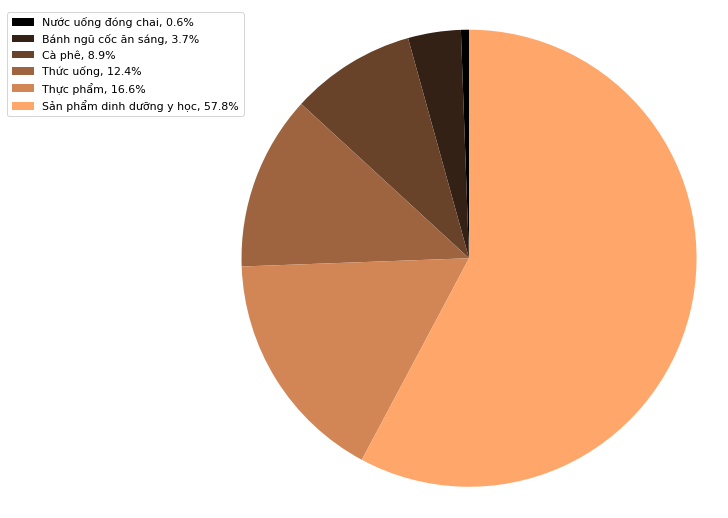

In [448]:
pie_chart(revenue_by_category_16['Product_category'], revenue_by_category_16['Revenue'])

### Nhận xét

Theo cơ cấu doanh thu theo loại hàng tháng 12 qua các năm, có thể thấy tại cả năm trước, Thức ăn công thức dinh dưỡng là một trong những loại hàng mang lại doanh thu lớn nhất. Cụ thể, năm 2014 doanh thu Thức ăn công thức dinh dưỡng chiếm tỷ trọng cao nhất là 46.2%, năm 2015 ít hơn là 28.6% do có sự vượt qua của Sản phẩm dinh dưỡng. 

Tuy nhiên, tới năm 2016 các sản phẩm thuộc loại hàng này không được bán nữa. Đây cũng sẽ được cho là nguyên nhân thứ 4 dẫn tới làm giảm sút doanh thu tháng 12 nói riêng 

## T12/2016 các sản phẩm Thức ăn công thức dinh dưỡng không được bán